In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model

from appias import appias

In [2]:
data = datasets.load_boston()
_df = pd.DataFrame(data.data, columns=data.feature_names)
features = [col for col in _df.columns if col != 'LSTAT']

df = pd.DataFrame()
for feature in features:
    values = np.concatenate((_df[feature].values, [np.inf, np.nan]))
    df[feature] = np.random.choice(values, 1000)
df['LSTAT'] = np.random.choice(_df['LSTAT'].values, 1000)
df['constant'] = 1

In [3]:
models = {'enet': linear_model.ElasticNet(),
          'ridge': linear_model.Ridge(),
          'lasso': linear_model.Lasso()
          }

ap = appias(df, response='LSTAT', models=models)

In [4]:
ap.reduce_memory_usage(verbose=1)

Before Reduction: 0.11 MB
After Reduction: 0.06 MB


In [5]:
ap.describe_features()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,constant
len,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
median,0.26838,0,8.56,0,0.538,6.2295,76.6,2.9634,5,330,18.7,390.96,1
nunique,441,25,76,3,81,390,311,359,10,64,47,311,1
na,5,2,2,2,2,2,2,3,3,5,1,1,0
type,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,constant
infinite,0,0,0,2,3,2,0,3,2,1,4,5,0
count,995,998,998,998,998,998,998,997,997,995,999,999,1000
mean,3.5198,11.1698,10.9135,inf,inf,inf,68.5729,inf,inf,inf,inf,inf,1
std,7.9759,23.3617,6.92944,NaN,NaN,NaN,28.4604,NaN,NaN,NaN,NaN,NaN,0
min,0.00632,0,0.46,0,0.389,3.561,2.9,1.1296,1,187,12.6,2.52,1


In [6]:
ap.verify()

..\appias\core.py:127: UserWarning: Dropped columns with constants: ['constant']
  warn("Dropped columns with constants: {}".format(cols.values), UserWarning)


In [7]:
ap.impute_features()
ap.describe_features()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
len,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
median,0.26938,0,8.56,0,0.538,6.23,76.5,2.9879,5,330,18.7,390.96
nunique,442,26,77,3,81,390,312,359,10,64,47,311
na,0,0,0,0,0,0,0,0,0,0,0,0
type,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
infinite,0,0,0,0,0,0,0,0,0,0,0,0
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
mean,3.5198,11.1698,10.9135,0.0601202,0.560239,6.31701,68.5729,3.73868,9.70812,404.61,18.3691,360.234
std,7.95592,23.3384,6.9225,0.237592,0.121177,0.705569,28.4319,2.19162,8.82395,164.662,2.1907,82.8375
min,0.00632,0,0.46,0,0.389,3.561,2.9,1.1296,1,187,12.6,2.52


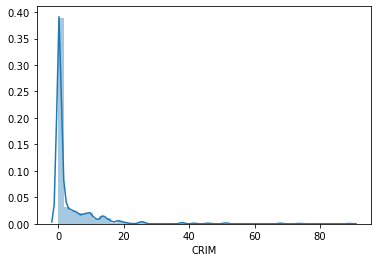

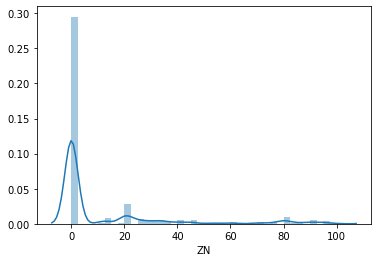

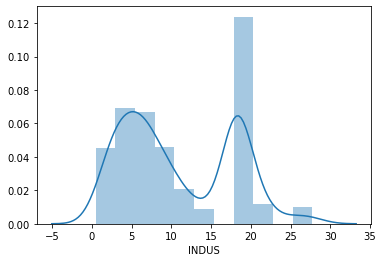

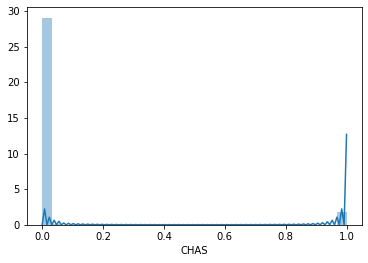

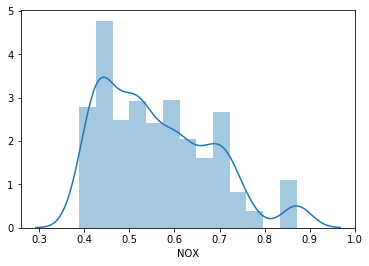

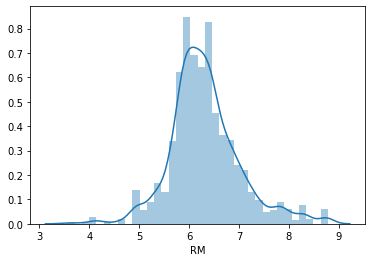

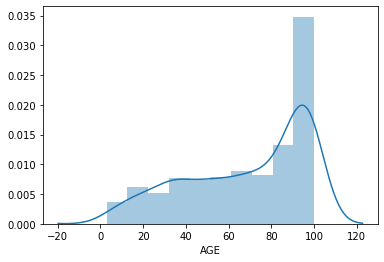

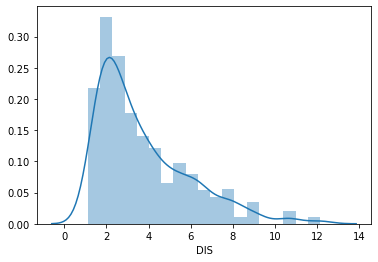

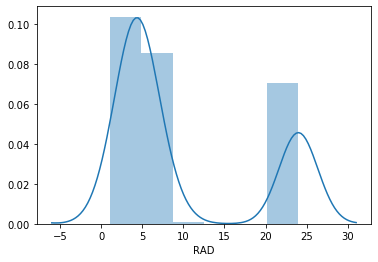

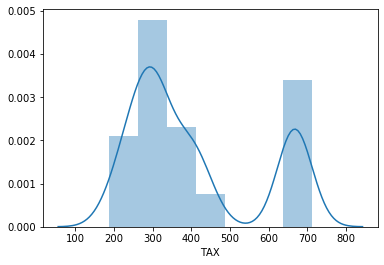

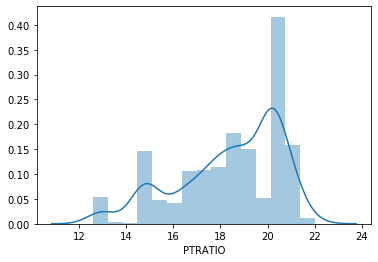

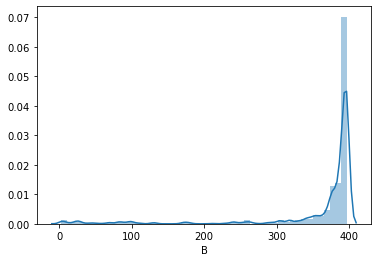

In [8]:
ap.plot_hist_features()

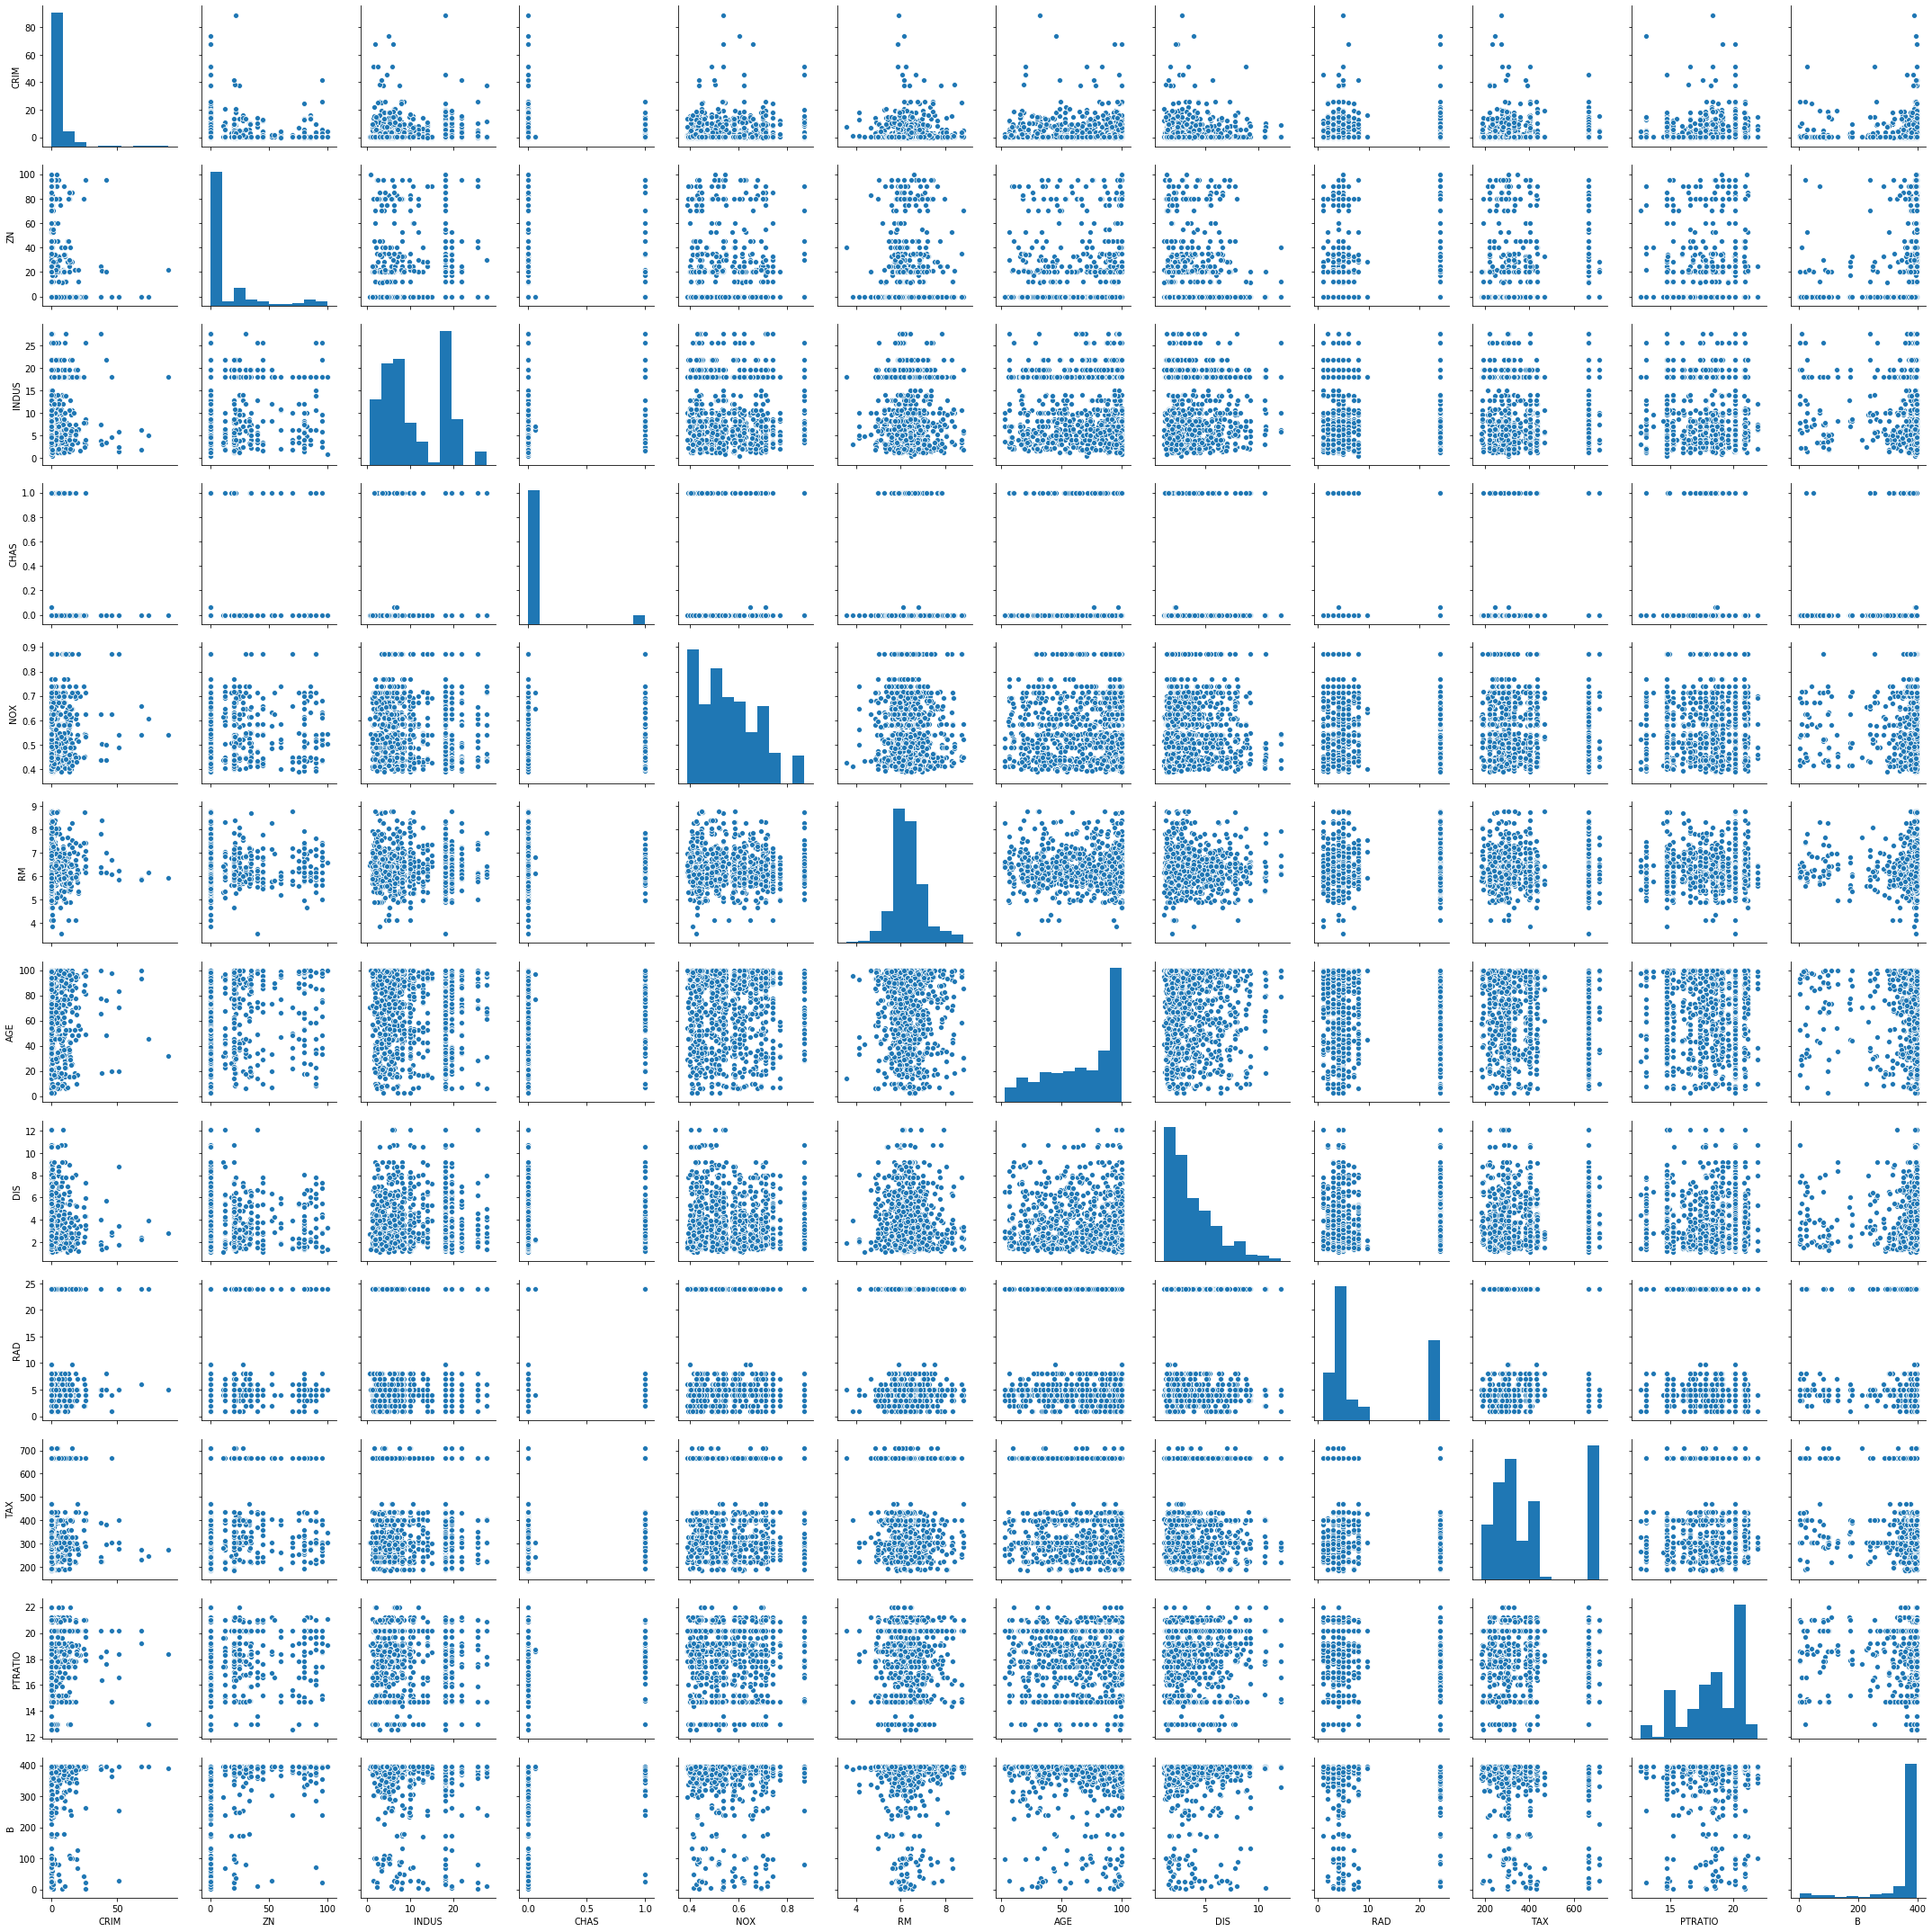

In [9]:
ap.pairplot()

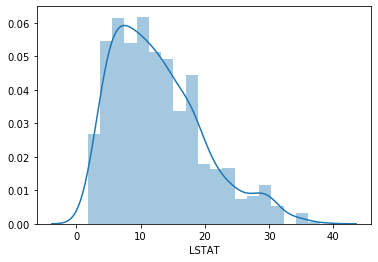

C:\Users\akglover\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:116: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  " 'check_inverse=False'.", UserWarning)


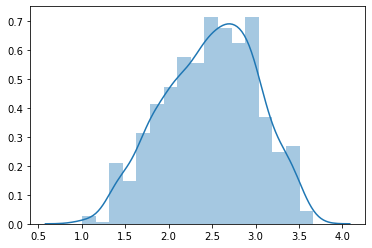

In [10]:
ap.y.plot_hist()

response_transformed = ap.y.transform(kind='log')
transformer = ap.y.transformer
response_transformed.plot_hist()

In [11]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

cvs = ap.cross_validate(transform_response=True)
cvs_avgs = ap.cross_validate_averages(cvs)

pp.pprint(cvs_avgs)


{   'enet': {   'fit_time': 0.015624189376831054,
                'score_time': 0.003125572204589844,
                'test_neg_mean_squared_error': -48.68662643432617,
                'test_r2': -0.0018315632139418003,
                'train_neg_mean_squared_error': -48.64930114746094,
                'train_r2': 2.6957979514752318e-05},
    'lasso': {   'fit_time': 0.010574769973754884,
                 'score_time': 0.00059967041015625,
                 'test_neg_mean_squared_error': -48.687093353271486,
                 'test_r2': -0.001841075376950041,
                 'train_neg_mean_squared_error': -48.65060958862305,
                 'train_r2': 0.0},
    'ridge': {   'fit_time': 0.00933537483215332,
                 'score_time': 0.007652473449707031,
                 'test_neg_mean_squared_error': -49.07876205444336,
                 'test_r2': -0.009723553338431046,
                 'train_neg_mean_squared_error': -47.731605529785156,
                 'train_r2': 0.01891190